In [29]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

import nengo
from nengo.utils.matplotlib import rasterplot
from nengo.dists import Uniform
from nengo.processes import Piecewise

import math

In [30]:
### CODE TO KEEP
### CHECKPOINT 2 PROGRESS

ensembleMatrix = []  # array filled with 5-dimensional neuron ensembles
costMatrix = []  # array filled with neuron ensembles representing the calculated cost
probeMatrix = []  # array filled with probes for each ensemble


# Generate Data

numSamples = 5

curveA = np.array([0.1, 0.6, 0.2, 0.3, 0])
curveB = np.array([0.1, 0.3, 0.4, 0.9, 0.8])

# Setup a sin and cos input function
# Uncomment this to use sin and cos curves instead of the test function

for i in range(numSamples):

    pass

In [31]:
with nengo.Network() as model:

    def calcCost(x):

        return np.abs(x[0] - x[1]) + np.min(
            x[2::]
        )  # DTW cost function - adds the minimum neighbor to the difference of the two output values

    input1 = nengo.Node(curveA) # first input curve
    input2 = nengo.Node(curveB) # second input curve

    # initialize matrices

    for r in range(numSamples):

        costMatrix.append([])
        ensembleMatrix.append([])

        for c in range(numSamples):

            # For each neuron ensemble, x[0] is the current value of curveA, x[1] is the current value of curveB, x[2] is the left neighbor, x[3] is the bottom neighbor, and x[4] is the bottom-left neighbor
            ensemble = nengo.Ensemble(300, dimensions=5, radius=3)
            ensembleMatrix[r].append(ensemble)

            costEns = nengo.Ensemble(300, dimensions=1, radius=3)
            costMatrix[r].append(costEns)

    # make the connections between the ensembles in "ensembleMatrix"

    for c in range(numSamples):

        for r in range(numSamples):

            if r < numSamples - 1:
                nengo.Connection(
                    (ensembleMatrix[r][c])[0], (ensembleMatrix[r + 1][c])[0]
                )  # Make all of the connections for the sin function

    for r in range(numSamples):

        for c in range(numSamples):

            if c < numSamples - 1:
                nengo.Connection(
                    (ensembleMatrix[r][c])[1], (ensembleMatrix[r][c + 1])[1]
                )  # Make all of the connections for the cos function

    # make the connections between each ensemble in "ensembleMatrix" to the corresponding neighbors in "costMatrix"

    for r in range(numSamples):

        for c in range(numSamples):
            if c > 0:  # connect to the left neighbor

                nengo.Connection((costMatrix[r][c - 1]), (ensembleMatrix[r][c])[2])

            if r > 0:  # connect to the bottom neighbor

                nengo.Connection((costMatrix[r - 1][c]), (ensembleMatrix[r][c])[3])

            if c > 0 and r > 0:  # connect to the bottom-left neighbor

                nengo.Connection((costMatrix[r - 1][c - 1]), (ensembleMatrix[r][c])[4])

    # Each ensemble in "ensembleMatrix" will need to be connected to the corresponding ensemble in "costMatrix"
    # in order to perform the correct calculation and build the cost matrix

    for r in range(numSamples):

        for c in range(numSamples):

            nengo.Connection(ensembleMatrix[r][c], costMatrix[r][c], function=calcCost)

    # Connect each input node to the corresponding start ensemble for every row and column

    for r in range(numSamples):
        nengo.Connection(input1[r], (ensembleMatrix[r][0])[0])

    for c in range(numSamples):
        nengo.Connection(input2[c], (ensembleMatrix[0][c])[1])

In [32]:
with model:

    # Fill the probe matrix

    for r in range(numSamples):

        for c in range(numSamples):

            probe = nengo.Probe(costMatrix[c][r], synapse=0.1)
            probeMatrix.append(probe)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

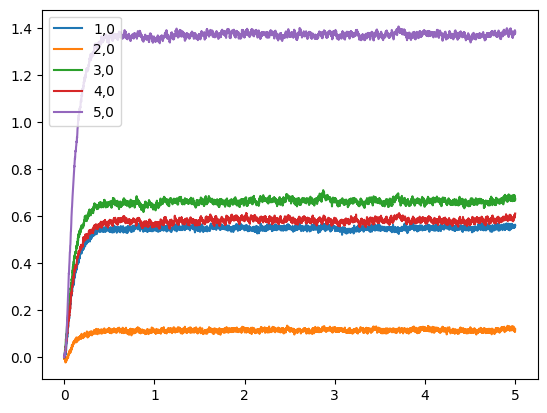

In [33]:
with nengo.Simulator(model) as sim:
    sim.run(5)

plt.figure()

plt.plot(sim.trange(), sim.data[probeMatrix[1]], label="1,0")
plt.plot(sim.trange(), sim.data[probeMatrix[6]], label="2,0")
plt.plot(sim.trange(), sim.data[probeMatrix[11]], label="3,0")
plt.plot(sim.trange(), sim.data[probeMatrix[16]], label="4,0")
plt.plot(sim.trange(), sim.data[probeMatrix[21]], label="5,0")
plt.legend()

In [34]:
# Creating an off-chip cost matrix

for i in range(len(probeMatrix) - 5, -1, -5):

    for x in range(5):

        print(round(np.mean(sim.data[probeMatrix[i + x]] * 10), 1), end="  ")

    print("\n")

21.0  13.4  11.0  14.1  11.2  

12.5  5.7  8.5  8.1  8.7  

5.8  6.5  7.9  6.1  9.3  

-0.1  1.1  3.6  4.5  9.3  

-1.4  5.4  5.2  6.0  10.3  



In [35]:
### CHECKPOINT 1 PROGRESS

# model = nengo.Network(label="DTW")


# ### TEST CURVES
# curveA = [
#     [0.02, 0.1],
#     [0.04, 0.3],
#     [0.06, 0.4],
#     [0.08, 0.9],
#     [0.1, 0.8],
#     [0.12, 0.2],
#     [0.14, 0.1],
#     [0.16, 0.5],
#     [0.18, 0.7],
#     [0.2, 0.3],
# ]
# curveB = [
#     [0.02, 0.1],
#     [0.04, 0.6],
#     [0.06, 0.2],
#     [0.08, 0.3],
#     [0.1, 0],
#     [0.12, 0.9],
#     [0.14, 0.4],
#     [0.16, 0.3],
#     [0.18, 0.6],
#     [0.2, 0.3],
# ]

# costMatrix = []

# numPoints = len(curveA)

# with model:

#     def absVal(x):
#         return abs(x)

#     def neg(x):
#         return x * -1

#     def lessThan(x):
#         if x[0]<x[1]:
#             return x[0]
#         else:
#             return x[1]

#     def greaterThan(x):
#         if x[0]>x[1]:
#             return x[0]
#         else:
#             return x[1]

#     for r in range(numPoints):

#         costMatrix.append([])

#         for c in range(numPoints):

#             below = 10
#             belowLeft = 10
#             left = 10

#             input_neuronA = nengo.Ensemble(100, dimensions=1)
#             input_neuronB = nengo.Ensemble(100, dimensions=1)

#             absValCalc = nengo.Ensemble(100, dimensions=1)
#             negative = nengo.Ensemble(100, dimensions=1)
#             difference = nengo.Ensemble(100, dimensions=1)
#             addNum = nengo.Ensemble(100, dimensions = 1)
#             DTWsum = nengo.Ensemble(100, dimensions=1)

#             input_nodeA = nengo.Node(output=curveA[r][1])
#             input_nodeB = nengo.Node(output=curveB[c][1])

#             nengo.Connection(
#                 input_nodeA, input_neuronA
#             )  ## Connect the node to the neuron ensemble
#             nengo.Connection(input_nodeB, input_neuronB)

#             nengo.Connection(
#                 input_neuronB, negative, function=neg
#             )  ## Flip the number negative to subtract

#             nengo.Connection(negative, difference)  ## Subtraction
#             nengo.Connection(input_neuronA, difference)  ## Subtraction

#             nengo.Connection(difference, absValCalc, function=absVal)

#             ### START CALCULATING MINIMUMS, TODO: IMPLEMENT NEURON DYNAMICS

#             if r > 0: ## check below
#                 below = costMatrix[r - 1][c]
#                 isBelow = 1

#             if c > 0: ## check left

#                 left = costMatrix[r][c - 1]
#                 isLeft = 1

#             if r > 0 & c > 0: ## check left and below

#                 belowLeft = costMatrix[r - 1][c - 1]
#                 isBelowLeft = 1


#             if (isBelow | isLeft | isBelowLeft):


#                 ### ONE AT A TIME
#                 if (isBelow == 1 & isLeft == 0 and isBelowLeft == 0):

#                     nengo.Connection(isBelow, addNum)

#                 elif (isBelow == 0 & isLeft == 1 and isBelowLeft == 0):

#                     nengo.Connection(isLeft, addNum)

#                 elif (isBelow == 0 & isLeft == 0 and isBelowLeft == 1):

#                     nengo.Connection(isBelowLeft, addNum)


#                 ### COMBOS OF TWO


#                 ### ALL THREE


#             #####

#             nengo.Connection(absValCalc, DTWsum)
#             nengo.Connection(addNum, DTWsum)

#             costMatrix[r].append(DTWsum)

#     ### neuron_probe = nengo.Probe(difference, synapse = 0.1) ## Probe the neuron ensemble